In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pytransform3d import rotations as pr
from pytransform3d import transformations as pt
from pytransform3d.transform_manager import TransformManager

In [ ]:
tm = TransformManager()
rng = np.random.default_rng(0)

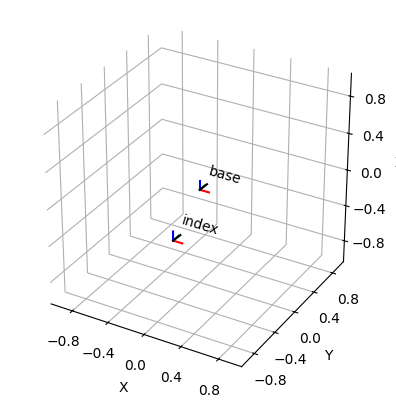

In [21]:

base = pt.transform_from_pq([0, 0, -0.8, 0, 0, 0, 0])
base2index = pt.transform_from_pq([0, 0.5, 0.3, 5, 0, 0, 0])

tm.add_transform("base", "index", base2index)

ax = tm.plot_frames_in("base", s=0.1)

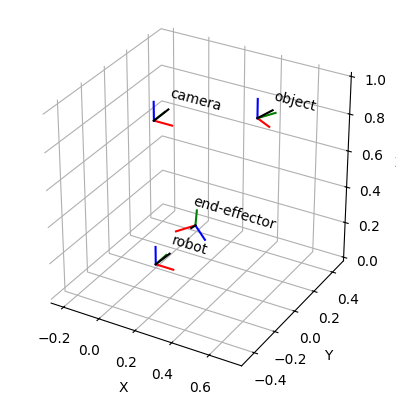

array([[-0.59842268, -0.79710781,  0.08068104,  0.10401196],
       [-0.68508324,  0.56131727,  0.4643101 , -0.39897558],
       [-0.41539287,  0.22258047, -0.88199019, -0.4       ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [29]:
rng = np.random.default_rng(0)

ee2robot = pt.transform_from_pq(
    np.hstack((np.array([0.4, -0.3, 0.5]),
               pr.random_quaternion(rng))))
cam2robot = pt.transform_from_pq(
    np.hstack((np.array([0.0, 0.0, 0.8]), pr.q_id)))
object2cam = pt.transform_from(
    pr.active_matrix_from_intrinsic_euler_xyz(np.array([0.0, 0.0, -0.5])),
    np.array([0.5, 0.1, 0.1]))

tm = TransformManager()
tm.add_transform("end-effector", "robot", ee2robot)
tm.add_transform("camera", "robot", cam2robot)
tm.add_transform("object", "camera", object2cam)

ee2object = tm.get_transform("end-effector", "object")

ax = tm.plot_frames_in("robot", s=0.1)
ax.set_xlim((-0.25, 0.75))
ax.set_ylim((-0.5, 0.5))
ax.set_zlim((0.0, 1.0))
plt.show()
ee2object

In [9]:
tm.get_transform("camera", "end-effector")

array([[-0.85361172, -0.31431799, -0.41539287,  0.12253143],
       [-0.43041808,  0.87475609,  0.22258047,  0.5013682 ],
       [ 0.2934064 ,  0.3687899 , -0.88199019, -0.27132265],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])